# Decision Tree

Estimated time needed: **15-30** minutes

## Objectives

After completing this lab you will be able to:

*   Develop a classification model using Decision Tree Algorithm


In this lab exercise, you will learn a popular machine learning algorithm, Decision Trees. You will use this classification algorithm to build a model from the historical data of patients, and their response to different medications. Then you will use the trained decision tree to predict the class of an unknown patient, or to find a proper drug for a new patient.


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#about_dataset">About the dataset</a></li>
        <li><a href="https://#downloading_data">Downloading the Data</a></li>
        <li><a href="https://#pre-processing">Pre-processing</a></li>
        <li><a href="https://#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="https://#modeling">Modeling</a></li>
        <li><a href="https://#prediction">Prediction</a></li>
        <li><a href="https://#evaluation">Evaluation</a></li>
        <li><a href="https://#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>


Import the Following Libraries:

<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>


if you uisng you own version comment out


In [ ]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['numpy'])
await piplite.install(['scikit-learn'])



In [ ]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of multiclass classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.
</div>


<div id="downloading_data"> 
    <h2>Downloading the Data</h2>
    To download the data, we will use !wget to download it from IBM Object Storage.
</div>


In [ ]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
await download(path,"drug200.csv")
path="drug200.csv"

Now, read the data using pandas dataframe:


In [ ]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

<div id="practice"> 
    <h3>Practice</h3> 
    What is the size of data? 
</div>


In [1]:
# write your code here

# Decision Tree - Drug Classification Example

# 1) Import required libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

# 2) Load dataset
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
my_data = pd.read_csv(path, delimiter=",")

# Display first few rows
print("\n--- First 5 Rows ---")
print(my_data.head())

# 3) Check dataset size
print("\n--- Dataset Shape ---")
print(my_data.shape)




--- First 5 Rows ---
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

--- Dataset Shape ---
(200, 6)


<details><summary>Click here for the solution</summary>

```python
my_data.shape

```

</details>


<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>


Remove the column containing the target name since it doesn't contain numeric values.


In [3]:
# Pre-processing

# Define feature matrix (X) and target vector (y)
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = my_data['Drug'].values

# Display first 5 rows of feature matrix
print("\n--- Feature Matrix (X) first 5 rows ---")
print(X[0:5])

# Display first 5 target values
print("\n--- Target Vector (y) first 5 values ---")
print(y[0:5])



--- Feature Matrix (X) first 5 rows ---
[[23 'F' 'HIGH' 'HIGH' 25.355]
 [47 'M' 'LOW' 'HIGH' 13.093]
 [47 'M' 'LOW' 'HIGH' 10.114]
 [28 'F' 'NORMAL' 'HIGH' 7.798]
 [61 'F' 'LOW' 'HIGH' 18.043]]

--- Target Vector (y) first 5 values ---
['drugY' 'drugC' 'drugC' 'drugX' 'drugY']


As you may figure out, some features in this dataset are categorical, such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using **pandas.get_dummies()**
to convert the categorical variable into dummy/indicator variables.


In [6]:
# Recreate X cleanly and encode deterministically

# start from the untouched DataFrame
X_df = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].copy()

# explicit mappings (avoids LabelEncoder issues on reruns)
sex_map  = {'F': 0, 'M': 1}
bp_map   = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
chol_map = {'NORMAL': 0, 'HIGH': 1}

X_df['Sex']         = X_df['Sex'].map(sex_map)
X_df['BP']          = X_df['BP'].map(bp_map)
X_df['Cholesterol'] = X_df['Cholesterol'].map(chol_map)

# verify no missing mappings
assert not X_df[['Sex','BP','Cholesterol']].isna().any().any(), "Unexpected category found."

X = X_df.values
print(X[:5])


[[23.     0.     2.     1.    25.355]
 [47.     1.     0.     1.    13.093]
 [47.     1.     0.     1.    10.114]
 [28.     0.     1.     1.     7.798]
 [61.     0.     0.     1.    18.043]]


Now we can fill the target variable.


In [7]:
# Fill target variable

y = my_data["Drug"]
print("\n--- Target Vector (y) first 5 values ---")
print(y[0:5])



--- Target Vector (y) first 5 values ---
0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object


<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


In [8]:
# Setting up the Decision Tree

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split dataset into training and test sets
# 70% training, 30% testing is common for classification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (140, 5) (140,)
Test set shape: (60, 5) (60,)


Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

<h3>Practice</h3>
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match.


In [9]:
# your code

# Practice: Check training set dimensions

print("X_trainset shape:", X_train.shape)
print("y_trainset shape:", y_train.shape)


X_trainset shape: (140, 5)
y_trainset shape: (140,)


<details><summary>Click here for the solution</summary>

```python
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

```

</details>


Print the shape of X_testset and y_testset. Ensure that the dimensions match.


In [10]:
# your code
# Check test set dimensions

print("X_testset shape:", X_test.shape)
print("y_testset shape:", y_test.shape)




X_testset shape: (60, 5)
y_testset shape: (60,)


<details><summary>Click here for the solution</summary>

```python
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

```

</details>


<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [11]:
# drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
# drugTree # it shows the default parameters

# Create Decision Tree with a maximum depth of 4

from sklearn.tree import DecisionTreeClassifier

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)

# Display the initialized model and its parameters
print(drugTree)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)


Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [12]:

# Fit the Decision Tree model using the correct training variables

drugTree.fit(X_train, y_train)

print("Decision Tree model trained successfully.")


Decision Tree model trained successfully.


<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [14]:
# Make predictions on the test set
predTree = drugTree.predict(X_test)

print("First 5 Predictions:", predTree[:5])
print("First 5 Actual Values:", y_test[:5])


First 5 Predictions: ['drugX' 'drugY' 'drugX' 'drugC' 'drugY']
First 5 Actual Values: 95     drugX
15     drugY
30     drugX
158    drugC
128    drugY
Name: Drug, dtype: object


You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the predictions to the actual values.


In [15]:
# Compare predictions and actual values

print("Predicted values:", predTree[0:5])
print("Actual values:", y_test[0:5])



Predicted values: ['drugX' 'drugY' 'drugX' 'drugC' 'drugY']
Actual values: 95     drugX
15     drugY
30     drugX
158    drugC
128    drugY
Name: Drug, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [16]:
from sklearn import metrics
import matplotlib.pyplot as plt

print("Decision Tree's Accuracy:", metrics.accuracy_score(y_test, predTree))


Decision Tree's Accuracy: 1.0


**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


<hr>

<div id="visualization">
    <h2>Visualization</h2>

Let's visualize the tree

</div>


In [ ]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

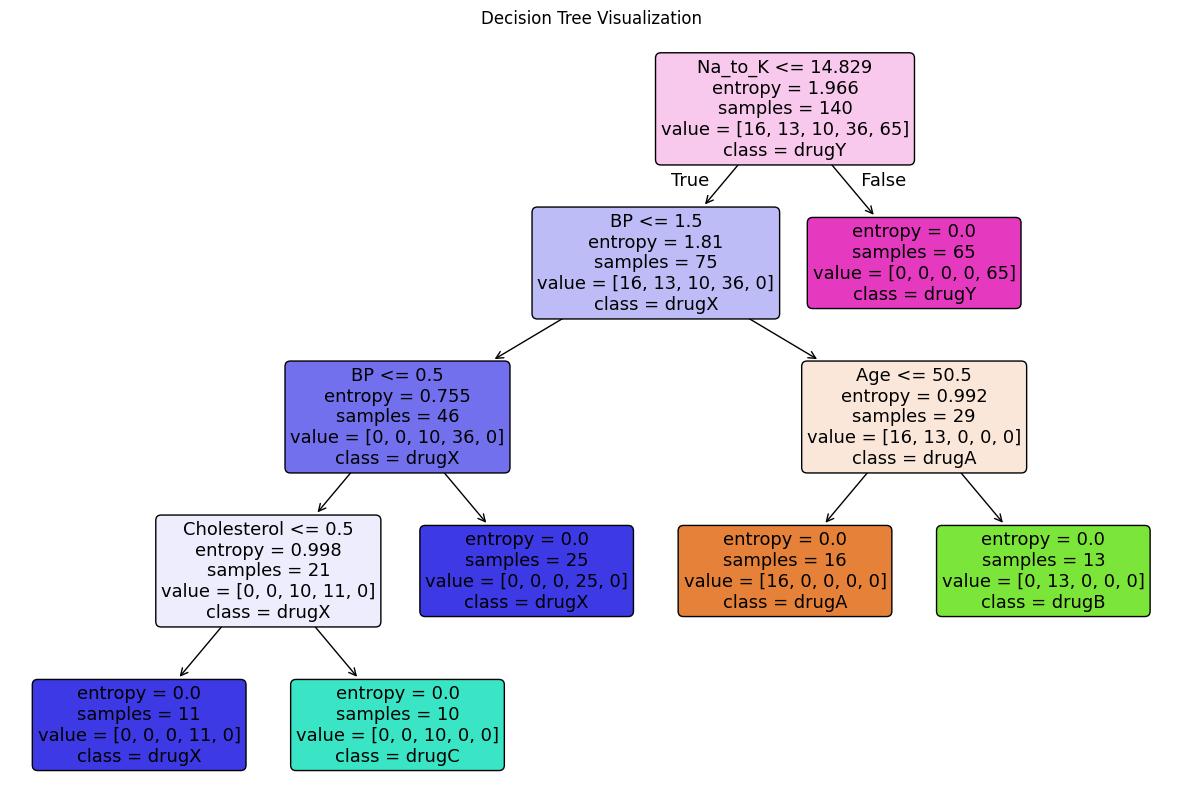

In [17]:
#tree.plot_tree(drugTree)
#plt.show()

# Visualize the trained Decision Tree

import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(
    drugTree,
    feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'],
    class_names=np.unique(y_train),
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()


### Thank you for completing this lab!